In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense, concatenate
from sklearn.datasets import fetch_california_housing
#from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
# Load data
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

In [7]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [11]:
# Split the dataset into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) #task find out the default split percentage

Functional API provides more flexibility in designing the model architecture compared to the Sequential API. It can be useful in certain situations, such as when dealing with more complex models that involve multiple inputs or outputs.

In [12]:
# Define the input layers
input_A = Input(shape=(6,))
input_B = Input(shape=(2,))

# Define the hidden layers
hidden_A = Dense(30, activation='relu')(input_A) #Dense layer takes input_A as input and applies the ReLU activation function to the weighted sum of the inputs
hidden_B = Dense(30, activation='relu')(input_B)

# Concatenate the output from the hidden layers
concat = concatenate([hidden_A, hidden_B])

# Define the output layer
output = Dense(1)(concat) # Dense layer is connected to the output of the previous layer

# Define the model
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Assume: California Housing dataset has two different types of input features: numerical and categorical. input_A represents the numerical input features of the dataset which have 6 dimensions, while input_B represents the categorical input features of the dataset which have 2 dimensions. By having two separate input layers, we can process these two types of features separately before concatenating them.

Concatenate layer is commonly used in building complex neural networks where multiple input branches merge into a single output. Ex: in a multi-modal learning problem where you have two different types of input data (e.g. text and images), you can create two separate branches of neural networks to process each type of input and then concatenate the outputs of both branches before feeding it into the final output layer.

In [13]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [14]:
# Train the model
history = model.fit([X_train[:, :6], X_train[:, 6:]],y_train,
    validation_data=([X_valid[:, :6], X_valid[:, 6:]], y_valid),
    epochs=5,
    batch_size=32)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 594.4890 - mae: 9.2482 - val_loss: 70.4416 - val_mae: 1.3221
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 2.4188 - mae: 1.0491 - val_loss: 55.5122 - val_mae: 1.1170
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 1.8346 - mae: 0.8921 - val_loss: 41.9317 - val_mae: 0.9451
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 1.3596 - mae: 0.7661 - val_loss: 30.8914 - val_mae: 0.8705
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2181 - mae: 0.7376 - val_loss: 23.0709 - val_mae: 0.7645


In [16]:
# Evaluate the model on the test set
mse, mae = model.evaluate([X_test[:, :6], X_test[:, 6:]], y_test)

print('MSE:', mse)
print('MAE:', mae)

162/162 [==============================] - 0s 2ms/step - loss: 0.8115 - mae: 0.6452
MSE: 0.8115228414535522
MAE: 0.6452131867408752


## Underfitting and overfitting

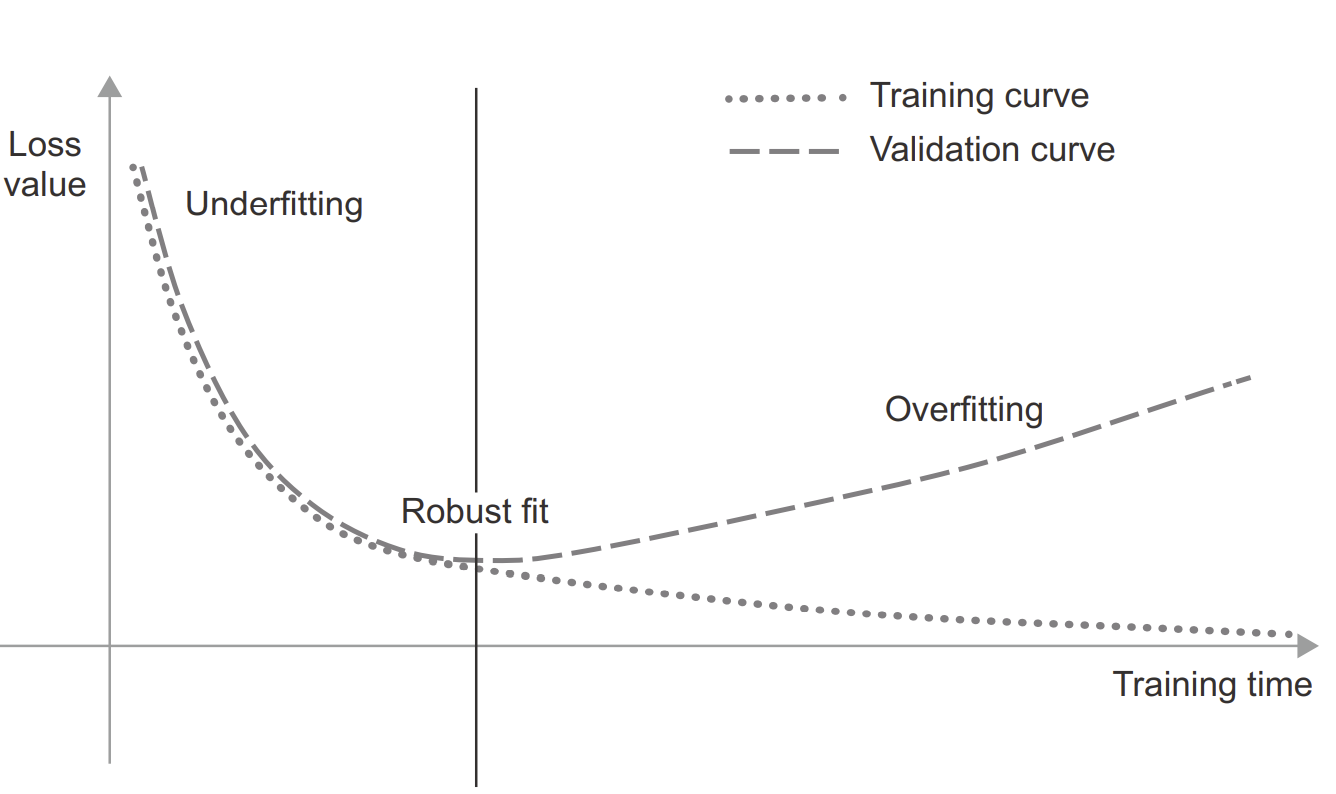

 after a certain number of iterations on the training data, generalization stops improving, validation metrics stall and then begin to degrade: the model is starting to overfit. That means it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

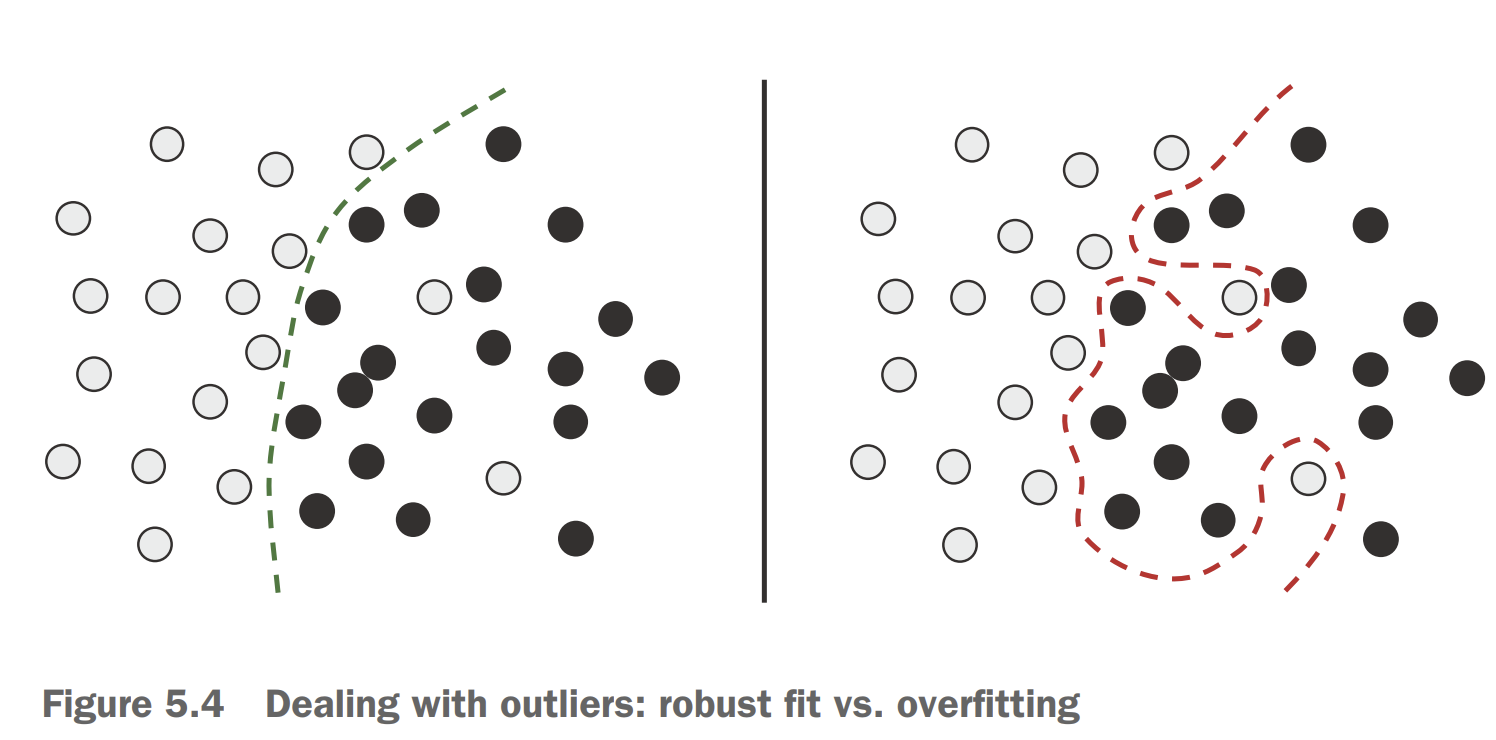

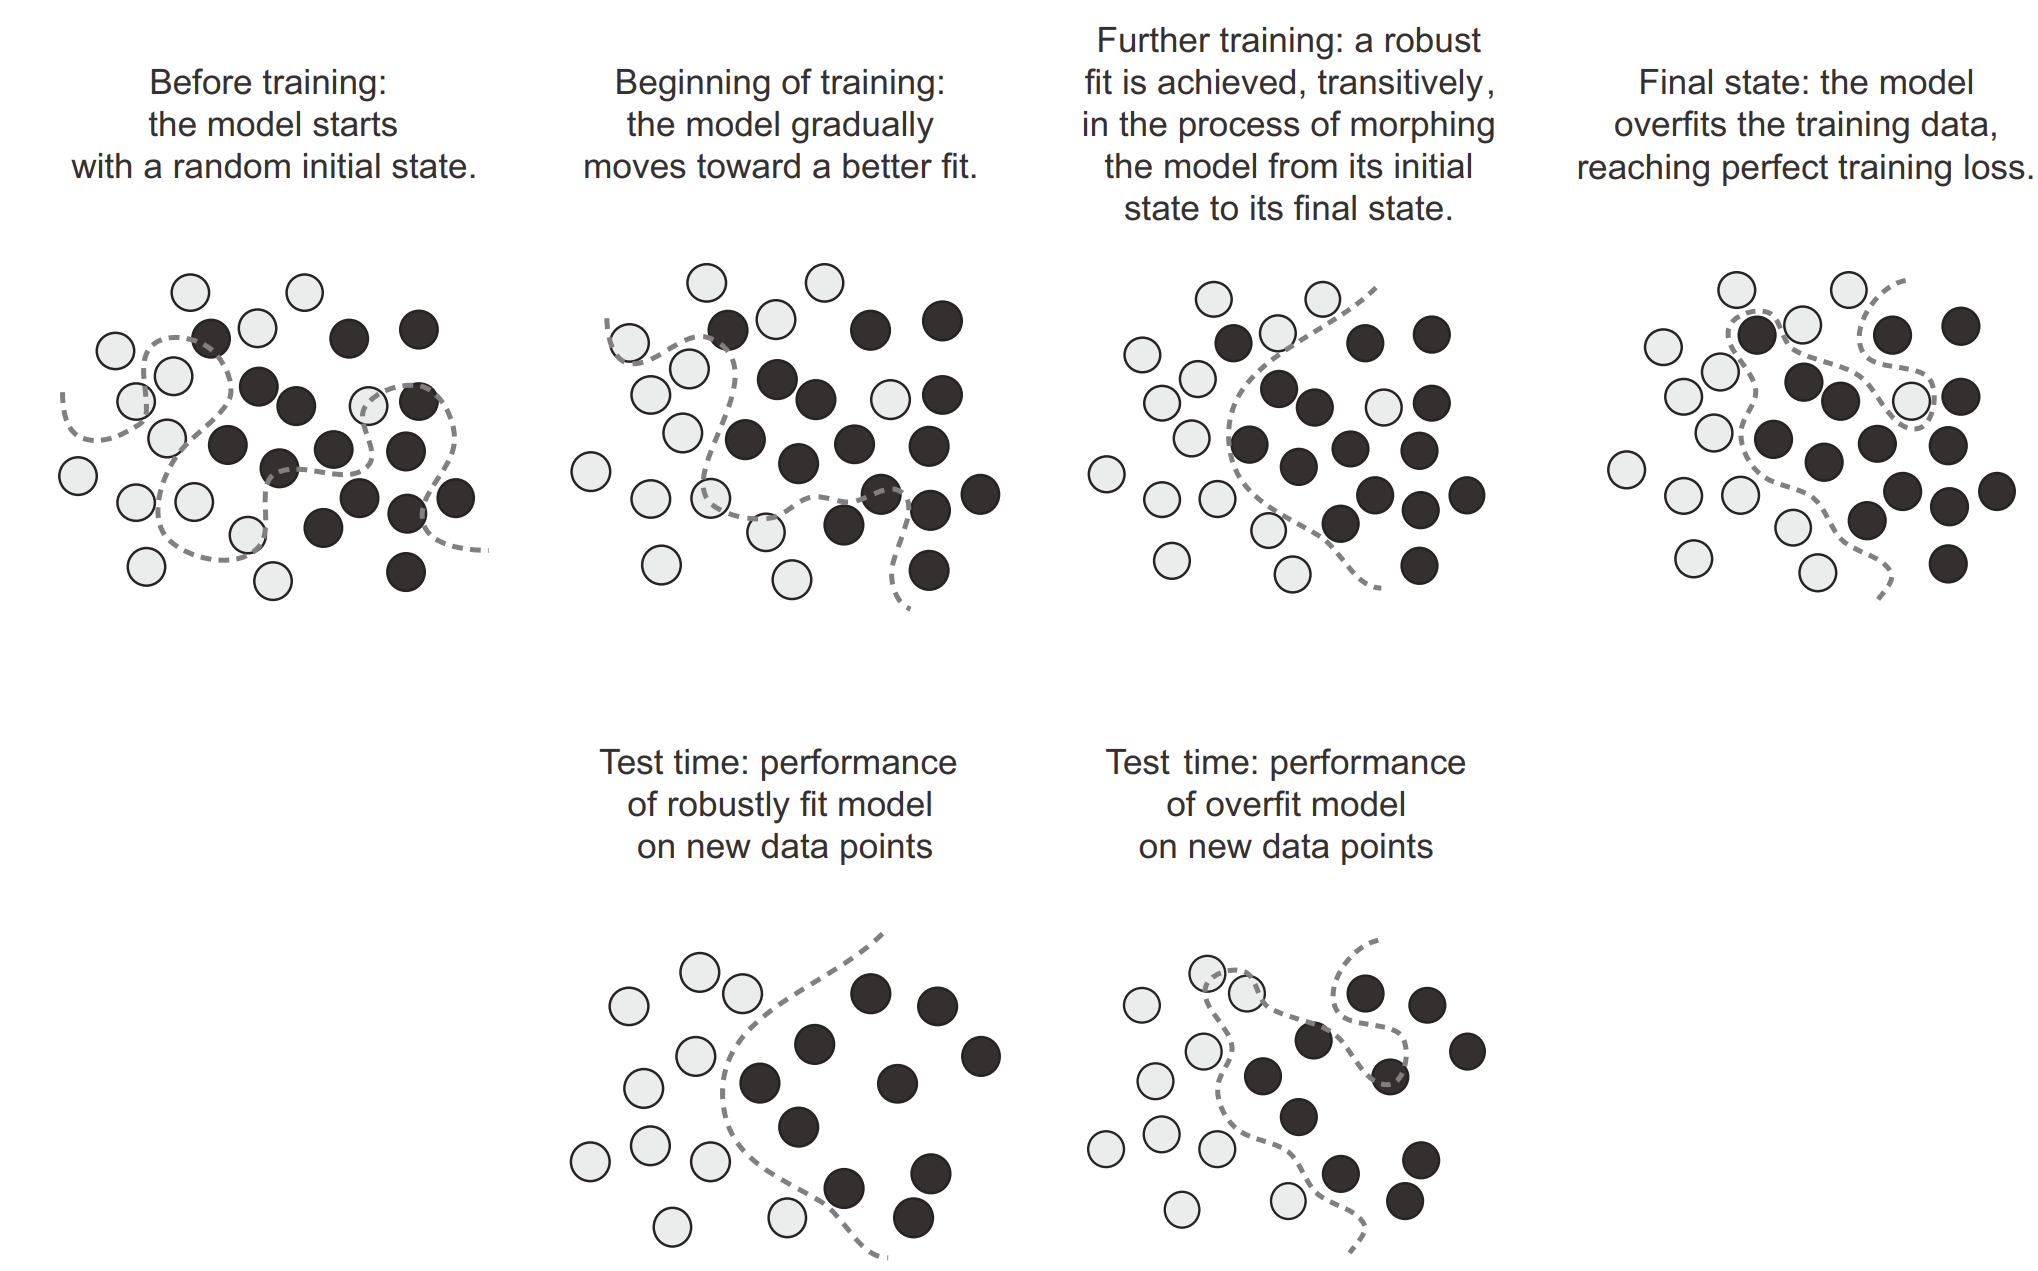

## K-fold cross validation

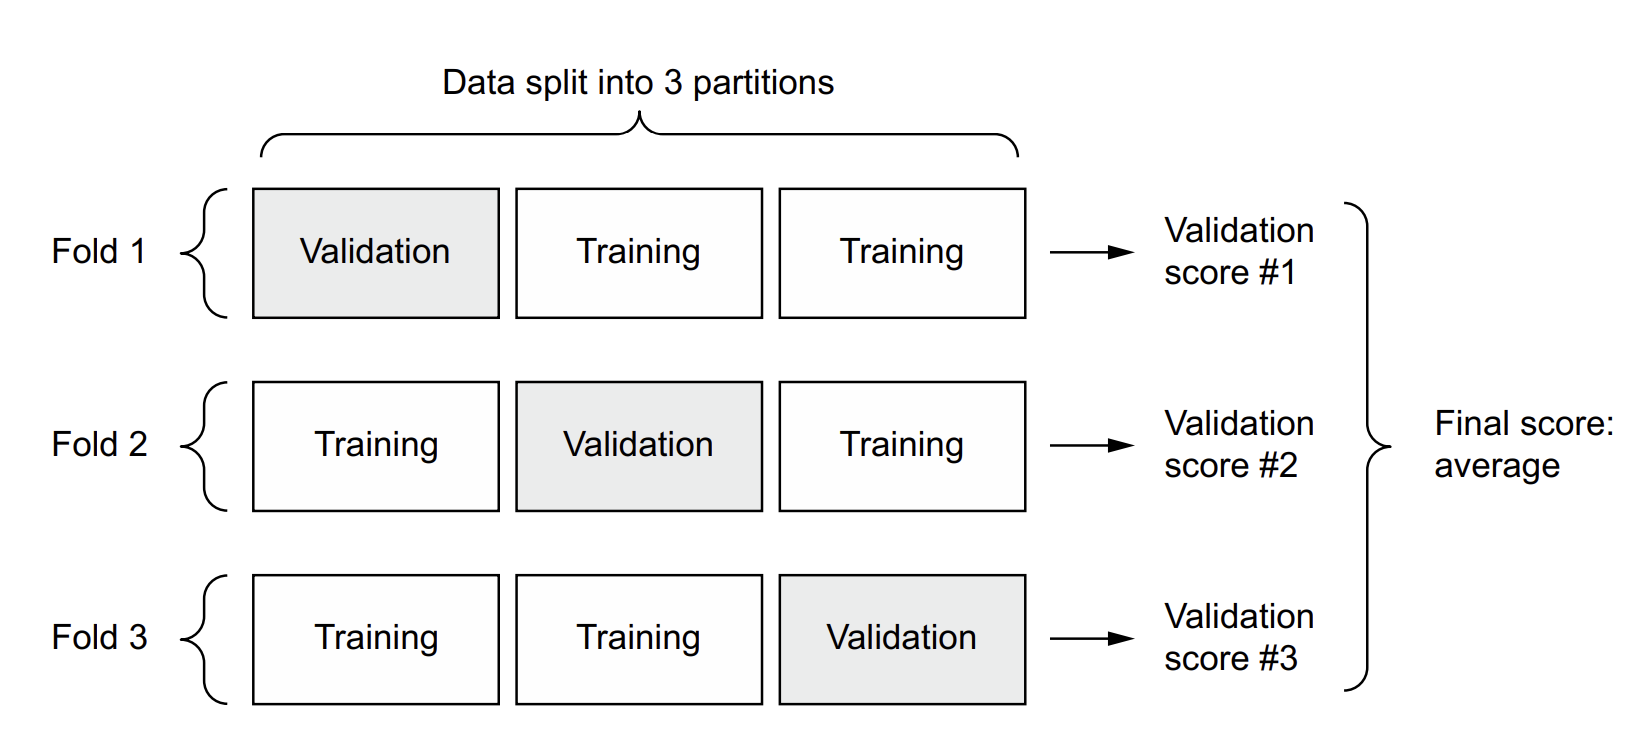